In [30]:
import os
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path

sys.path.append(str(Path.cwd().parent / 'scripts'))

from build_wholesale_prices import get_extremes, get_price_distribution

In [3]:
path = Path.cwd().parent / 'data' / 'base'

In [24]:
bids = []
offers = []
pns = []
dah = []

for d in tqdm(os.listdir(path)):

    try:
        bids.append(
            pd.read_csv(path / d / 'bids.csv', index_col=[0,1]
            )
        )
    except FileNotFoundError:
        pass

    try:
        offers.append(
            pd.read_csv(path / d / 'offers.csv', index_col=[0,1]
            )
        )
    except FileNotFoundError:
        pass

    try:
        pns.append(
            pd.read_csv(path / d / 'physical_notifications.csv', index_col=0
            )
        )
    except FileNotFoundError:
        pass

    try:
        dah.append(
            pd.read_csv(path / d / 'day_ahead_prices.csv', index_col=0
            )
        )
    except FileNotFoundError:
        pass


offers = pd.concat(offers)
bids = pd.concat(bids)
pns = pd.concat(pns)
dah = pd.concat(dah)

100%|██████████| 851/851 [00:51<00:00, 16.46it/s]


In [26]:
bmus = pd.read_csv(Path.cwd().parent / 'data' / 'bmus_prepared.csv', index_col=0)
h = bmus.loc[bmus['carrier'] == 'hydro'].index

bidding_h = h.intersection(bids.columns)
offering_h = h.intersection(offers.columns)

In [62]:
idx = pd.IndexSlice

o = offers.loc[idx[:, 'price'], offering_h].std().sort_values(ascending=True)
o

LCSMH-1        0.000000
FASN-1        78.365161
CAS-GAR01     89.352801
FASN2         97.449252
CAS-KIL01    102.124661
GLNDO-1      102.327558
SLOY-4       105.237621
FASN3        107.684510
SLOY-3       109.949890
NANT-1       130.021871
ERRO-1       141.952180
SLOY-2       145.987576
SLOY-1       148.744301
ERRO-2       150.182155
FINL-1       150.334757
CLAC-1       154.325696
ERRO-3       157.884102
RHEI-4       615.616811
dtype: float64

In [76]:

b = bids.loc[idx[:, 'price'], bidding_h].std().sort_values(ascending=True)
plot_bids = bids.copy().loc[idx[:, 'price'], :]
plot_bids.index = plot_bids.index.droplevel(1)
plot_bids.index = pd.to_datetime(plot_bids.index)
b

FASN-4        0.000000
CAS-CLU01    11.533848
CAS-MOR01    19.309559
LCSMH-1      20.666877
CAS-KIL01    30.158900
CAS-GAR01    31.065319
CAS-BEU01    35.621446
SLOY-4       36.147601
ERRO-1       37.053834
ERRO-2       38.026695
CAS-CON01    40.177711
ERRO-3       41.050082
SLOY-3       42.679298
CLAC-1       45.635594
GLNDO-1      49.563479
NANT-1       49.853070
FASN3        52.120279
SLOY-2       52.248106
FASN2        52.288455
SLOY-1       52.385861
FINL-1       55.273885
FASN-1       56.284019
RHEI-4       90.824604
dtype: float64

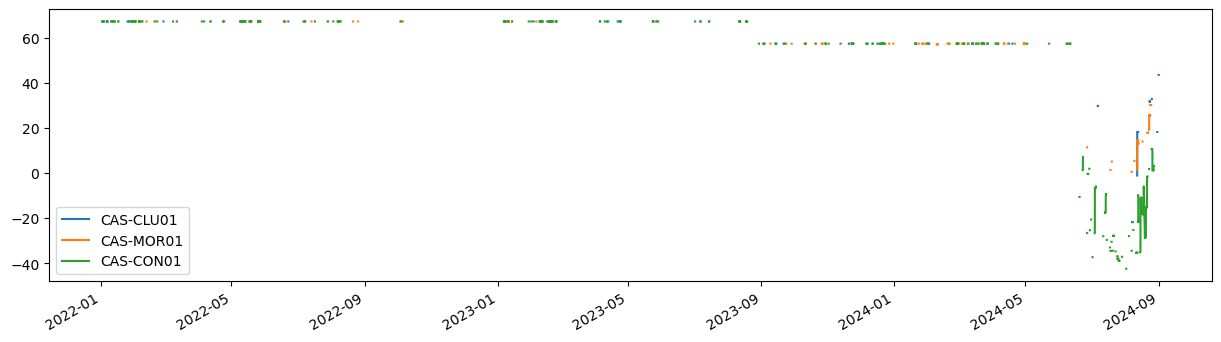

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
# bids.loc[idx[:, 'price'], b.index[-6:]].plot(ax=ax)
plot_bids.loc[
    :,
    [
        # 'FASN-1',
        'CAS-CLU01',
        'CAS-MOR01',
        # 'ERRO-3',
        # 'LCSMH-1',
        'CAS-CON01',
        ]
    ].plot(ax=ax)

plt.show()

<Axes: >

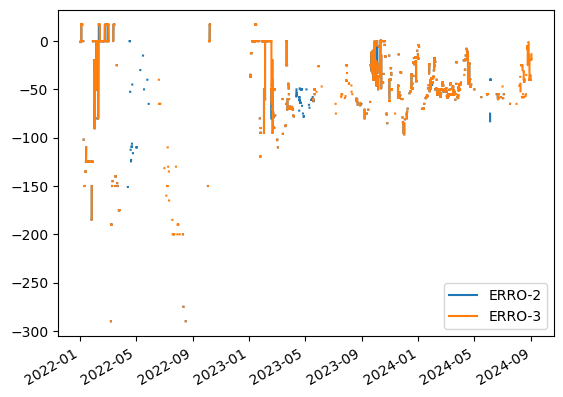

In [97]:
cas = b.index[b.index.str.contains('CAS')].to_list() + ['LCSMH-1']
non_cas = b.index[~b.index.str.contains('CAS')].to_list()
non_cas.remove('LCSMH-1')

plot_bids.loc[
    :,#pd.Timestamp('2023-05-22', tz='utc'):pd.Timestamp('2023-05-25', tz='utc'),
    # ['CAS-MOR01']
    # cas
    # non_cas
    ['ERRO-2', 'ERRO-3'] 
    ].plot()

<Axes: >

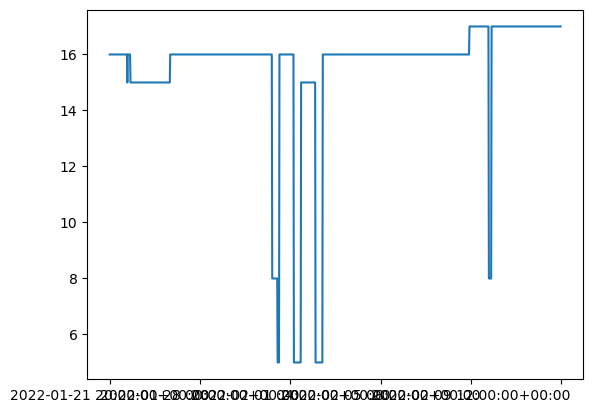

In [94]:
# pns[h].iloc[:500].plot()
# pns['CAS-CLU01'].iloc[1000:2000].plot()
# pns[cas].iloc[1000:2000].plot()
# pns[non_cas].iloc[1000:2000].plot()
pns['LCSMH-1'].iloc[1000:2000].plot()

In [34]:
bmus.loc[bmus.carrier == 'battery']

,lat,lon,capacity,carrier
NationalGridBmUnit,,,,
BFSE01,52.585,-1.22,50.0,battery
AG-HLIM01,51.598,-1.494,60.0,battery
AG-HLIM02,50.852,-1.194,60.0,battery
AG-HLIM03,51.616,-1.99,100.0,battery
AG-HLIM04,51.598,-1.494,100.0,battery
...,...,...,...,...
AG-MSTK01,53.791,-0.405,50.0,battery
AG-JSTK02,51.231,-0.334,6.0,battery
AG-HSTK02,51.615,-1.962,100.0,battery
